In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('/Users/chrliu713gmail.com/Projects/datasci_200/1657049788_export.csv')

In [6]:
# nan location
networks_dict = {
   # 'BBCNEWS':'',
    'KCRG':'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
    'KFXA':'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
    'KGAN':'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
    'KSNV':'Las Vegas, NV',
    'WFLA':'Tampa-St. Petersburg, FL',
    'WFTS':'Tampa-St. Petersburg, FL',
    'WHDH':'Boston, MA/Manchester, NH',
    'WNCN':'Raleigh-Durham-Fayetteville,  NC',
    'WTOG':'Tampa-St. Petersburg, FL',
    'WTVT':'Tampa-St. Petersburg, FL'
}

In [7]:
df['location'] = df.apply(lambda row: networks_dict.get(row['network'], row['location']), axis=1)

In [8]:
df[df.location.isnull()]

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
364183,464204,8187,BBCNEWS,NaN,Newsday,news,2016-11-08 01:04:42 UTC,2016-11-08 01:06:42 UTC,PolAd_HillaryClinton_3av1e,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Candidate Biography, Economy, Election, Childr...",Hillary Clinton,campaign,pro,2016-11-28 19:40:13
364184,464206,4852,BBCNEWS,NaN,Victoria Derbyshire,not news,2016-11-08 09:23:06 UTC,2016-11-08 09:23:35 UTC,PolAd_DonaldTrump_5dwaz,https://archive.org/embed/PolAd_DonaldTrump_5dwaz,MoveOn.org,Hybrid Super PAC,PRES,2016.0,"Candidate Biography, Guns, Supreme Court",Donald Trump,campaign,con,2016-11-28 20:42:16


In [9]:
#364183,364184	
df = df.drop(364184)
df = df.drop(364183)
df.loc[df.network=='BBCNEWS']

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created


In [10]:
convert_location_dict= {
'Cleveland, Ohio':'Cleveland, OH',
'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa':'eder Rapids-Waterloo-Iowa City-Dublin, IA',
'Washington, DC/Hagerstown, MD':'Washington DC/Hagerstown, MD',
'Sioux City, Iowa':'Sioux City, IA',
'Des Moines-Ames, Iowa':'Des Moines-Ames, IA', 
'Greenville-Spartanburg, SC/Asheville-Anderson, NC':'Greenville-Spartanburg SC/Asheville-Anderson, NC',
'Boston, MA/Manchester, NH': 'Boston MA/Manchester, NH'
}

In [11]:
df['location'] = df.apply(lambda row: convert_location_dict.get(row['location'], row['location']), axis=1)
df.location.unique()

array(['Las Vegas, NV', 'Raleigh-Durham-Fayetteville,  NC',
       'Tampa-St. Petersburg, FL', 'Cleveland, OH',
       'eder Rapids-Waterloo-Iowa City-Dublin, IA', 'Philadelphia, PA',
       'Denver, CO', 'Milwaukee, WI',
       'San Francisco-Oakland-San Jose, CA', 'Phoenix-Prescott, AZ',
       'Boston MA/Manchester, NH', 'Washington DC/Hagerstown, MD',
       'Orlando-Daytona Beach-Melbourne, FL', 'Sioux City, IA',
       'New York City, NY', 'Reno, NV', 'Cincinnati, OH',
       'Des Moines-Ames, IA', 'Norfolk-Portsmouth-Newport News, NC',
       'Greenville-Spartanburg SC/Asheville-Anderson, NC',
       'Colorado Springs-Pueblo, CO', 'Miami-Fort Lauderdale, FL',
       'Charlotte, NC', 'Columbia, SC', 'Roanoke-Lynchburg, VA'],
      dtype=object)

In [12]:
# Create states column for easier regional comparisons
state_dict = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

In [13]:
df['state'] = df.location.str.split(', ').str[1].map(state_dict)
df.head(1)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,state
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,Nevada


In [14]:
df.location[df.state.isnull()].unique()

array(['Raleigh-Durham-Fayetteville,  NC'], dtype=object)

In [15]:
df.loc[df.location=='Raleigh-Durham-Fayetteville,  NC','state'] = 'North Carolina'
df.location[df.state.isnull()].unique()

array([], dtype=object)

In [187]:
top_candidates = ['Donald Trump', 'Hillary Clinton']
df = df[df['candidates'].isin(top_candidates)]

# Election results dataset

In [20]:
pres = pd.read_csv('/Users/chrliu713gmail.com/Projects/datasci_200/1976-2020-president.csv', dtype={"state_fips":str})
pres.head(1)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT


In [21]:
# Filter for 2016 
pres = pres[pres.year==2016]
pres = pres[['state','state_fips','office','candidate','party_simplified','candidatevotes','totalvotes']]
pres.columns = ['state','state_fips','office','candidate','party','candidatevotes','totalvotes']
pres.head(1)

,state,state_fips,office,candidate,party,candidatevotes,totalvotes
3395,ALABAMA,1,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,1318255,2123372


In [22]:
# Format state_fips to match json for plotly graph
pres.state = pres.state.str.title()
pres.state_fips = pres.state_fips.astype(str).str.zfill(2)
pres.head(1)

,state,state_fips,office,candidate,party,candidatevotes,totalvotes
3395,Alabama,01,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,1318255,2123372


In [23]:
# Find winners in each state

def find_winner(df):
    """Returns dataframe"""
    winners_idx = df.groupby('state')['candidatevotes'].idxmax()
    winners = df.loc[winners_idx][['state', 'state_fips', 'party', 'candidate']] 
    return winners

pres_results = find_winner(pres)
pres_results.head(5)

,state,state_fips,party,candidate
3395,Alabama,01,REPUBLICAN,"TRUMP, DONALD J."
3400,Alaska,02,REPUBLICAN,"TRUMP, DONALD J."
3407,Arizona,04,REPUBLICAN,"TRUMP, DONALD J."
3417,Arkansas,05,REPUBLICAN,"TRUMP, DONALD J."
3425,California,06,DEMOCRAT,"CLINTON, HILLARY"


In [24]:
pres_results.columns = ['state','state_fips','winning_party','winning_candidate']

# Top content by state for top 2 candidates

In [ ]:
# split the subjects column into individual rows
filtered_exploded = df.assign(subjects=df['subjects'].str.split(', ')).explode('subjects')
filtered_clinton = filtered_exploded[filtered_exploded.candidates=='Hillary Clinton']
filtered_trump = filtered_exploded[filtered_exploded.candidates=='Donald Trump']

In [ ]:
# Top subjects per candidate per state
top_subjects_clinton = filtered_clinton.groupby(['state','candidates'])['subjects'].value_counts().groupby(level=0).head(3).reset_index(name='count')
top_subjects_trump = filtered_trump.groupby(['state','candidates'])['subjects'].value_counts().groupby(level=0).head(3).reset_index(name='count')


In [ ]:
# combine with election results
top_subjects_clinton = top_subjects_clinton.merge(pres_results, on='state', how='left')
top_subjects_trump = top_subjects_trump.merge(pres_results, on='state', how='left')

In [209]:
top_subjects_trump.subjects.drop_duplicates().sort_values().to_list()

['Candidate Biography',
 'Children',
 'Disability',
 'Foreign Policy',
 'Health Care',
 'Immigration',
 'Jobs',
 'Legal Issues',
 'Military',
 'Taxes',
 'Terrorism',
 'Veterans',
 'Women']

In [224]:
# Map subject to colors for graph 
clinton_subjects = {
'Candidate Biography':'#845ec2',
'Children':'#d65db1',
'Civil Rights':'#ff6f91',
'Economy':'#ff9671',
'Foreign Policy':'#ffc75f',
'Health Care':'#f9f871',
'Islam':'#2c73d2',
'Job Accomplishments':'#008f7a',
'Jobs':'#fbeaff',
'Legal Issues':'#fbeaff',
'Nuclear':'#fbeaff',
'Social Security':'#fefedf',
'Taxes':'#2184a0',
'Terrorism':'#d3e9f3',
'Women':'#4ffbdf'
}
trump_subjects = {
'Candidate Biography':'#845ec2',
'Children':'#d65db1',
'Disability':'#fefedf',
'Foreign Policy':'#ffc75f',
'Health Care':'#f9f871',
'Immigration':'#0089ba',
'Jobs':'#fbeaff',
'Legal Issues':'#fbeaff',
'Military':'#c34a36',
'Taxes':'#2184a0',
'Terrorism':'#d3e9f3',
'Veterans':'#936c00',
'Women':'#4ffbdf'
}

In [222]:
# States Trump Won 
import plotly.express as px

fig = px.bar(top_subjects_trump[top_subjects_trump.winning_candidate=='TRUMP, DONALD J.'],
             x='state',
             y='count',
             color='subjects',
             title='Trump Ads',
             labels={'state': 'State', 'count': 'Ad Counts', 'subjects': 'Subjects'},
             width=800,
             color_discrete_map=trump_subjects,
             )

fig.update_layout(barmode='stack', xaxis_title='State', yaxis_title='Ads Count', legend_title='Subjects')
fig.update_layout(yaxis=dict(range=[0,17000]))
fig.show()

In [225]:
fig = px.bar(top_subjects_clinton[top_subjects_clinton.winning_candidate=='TRUMP, DONALD J.'],
             x='state',
             y='count',
             color='subjects',
             title='Clinton Ads',
             labels={'state': 'State', 'count': 'Ad Counts', 'subjects': 'Subjects'},
             width=800,
             color_discrete_map=clinton_subjects)

fig.update_layout(barmode='stack', xaxis_title='State', yaxis_title='Ads', legend_title='Subjects')
fig.update_layout(yaxis=dict(range=[0,17000]))
fig.show()

In [226]:
fig = px.bar(top_subjects_trump[top_subjects_trump.winning_candidate=='CLINTON, HILLARY'].sort_values(by=["state","subjects"]),
             x='state',
             y='count',
             color='subjects',
             title='Trump Ads',
             labels={'state': 'State', 'count': 'Ad Counts', 'subjects': 'Subjects'},
             color_discrete_map=trump_subjects,
             width=800,
             )

fig.update_layout(barmode='stack', xaxis_title='State', yaxis_title='Ads Count', legend_title='Subjects')
fig.update_layout(yaxis=dict(range=[0,10000]))
fig.show()

In [228]:

fig = px.bar(top_subjects_clinton[top_subjects_clinton.winning_candidate=='CLINTON, HILLARY'].sort_values(by=["state","subjects"]),
             x='state',
             y='count',
             color='subjects',
             title='Clinton Ads',
             labels={'state': 'State', 'count': 'Ad Counts', 'subjects': 'Subjects'},
             width=800,
             color_discrete_map=clinton_subjects)

fig.update_layout(barmode='stack', xaxis_title='State', yaxis_title='Ads Count', legend_title='Subjects')
fig.update_layout(yaxis=dict(range=[1000,10000]))
fig.show()

# Tone

In [17]:
clinton_ads = df[df.candidates.str.contains('Clinton', na=False)].groupby(['state','message']).size().unstack(fill_value=0)
trump_ads = df[df.candidates.str.contains('Trump', na=False)].groupby(['state','message']).size().unstack(fill_value=0)

In [25]:
# Merge with election results
clinton_ads=clinton_ads.add_prefix('Clinton_')
trump_ads=trump_ads.add_prefix('Trump_')
message_counts = pd.concat([clinton_ads, trump_ads],axis=1)
message_counts = message_counts.merge(pres_results, on='state', how='left')
message_counts.columns

Index(['state', 'Clinton_Clinton_con', 'Clinton_Clinton_mixed',
       'Clinton_Clinton_pro', 'Clinton_Clinton_unknown', 'Trump_Trump_con',
       'Trump_Trump_mixed', 'Trump_Trump_pro', 'Trump_Trump_unknown',
       'state_fips', 'winning_party', 'winning_candidate'],
      dtype='object')

In [26]:
message_counts.columns = ['state', 'Clinton_con', 'Clinton_mixed', 'Clinton_pro',
       'Clinton_unknown', 'Trump_con', 'Trump_mixed', 'Trump_pro',
       'Trump_unknown', 'state_fips', 'winning_party', 'winning_candidate']
message_counts.head(3)

,state,Clinton_con,Clinton_mixed,Clinton_pro,Clinton_unknown,Trump_con,Trump_mixed,Trump_pro,Trump_unknown,state_fips,winning_party,winning_candidate
0,Arizona,662,851,484,12,1803,1108,71,25,04,REPUBLICAN,"TRUMP, DONALD J."
1,California,2214,1623,1300,371,4184,1947,847,2098,06,DEMOCRAT,"CLINTON, HILLARY"
2,Colorado,875,1584,1247,9,1573,1585,652,21,08,DEMOCRAT,"CLINTON, HILLARY"


In [27]:
# Drop unknown
message_counts = message_counts.drop(columns=['Clinton_unknown','Trump_unknown'])
message_counts.head(1)

,state,Clinton_con,Clinton_mixed,Clinton_pro,Trump_con,Trump_mixed,Trump_pro,state_fips,winning_party,winning_candidate
0,Arizona,662,851,484,1803,1108,71,04,REPUBLICAN,"TRUMP, DONALD J."


In [28]:
def get_percentages(row):
    clinton_total = row['Clinton_con'] + row['Clinton_pro'] + row['Clinton_mixed']
    trump_total = row['Trump_con'] + row['Trump_pro'] + row['Trump_mixed']
    return pd.Series({
        'Clinton_con_pct': row['Clinton_con'] / clinton_total * 100 if clinton_total > 0 else 0,
        'Clinton_mixed_pct': row['Clinton_mixed'] / clinton_total * 100 if clinton_total > 0 else 0,
        'Clinton_pro_pct': row['Clinton_pro'] / clinton_total * 100 if clinton_total > 0 else 0,
        'Trump_con_pct': row['Trump_con'] / trump_total * 100 if trump_total > 0 else 0,
        'Trump_mixed_pct': row['Trump_mixed'] / trump_total * 100 if trump_total > 0 else 0,
        'Trump_pro_pct': row['Trump_pro'] / trump_total * 100 if trump_total > 0 else 0,
    })

message_pct = message_counts.join(message_counts.apply(get_percentages, axis=1))
message_pct

,state,Clinton_con,Clinton_mixed,Clinton_pro,Trump_con,Trump_mixed,Trump_pro,state_fips,winning_party,winning_candidate,Clinton_con_pct,Clinton_mixed_pct,Clinton_pro_pct,Trump_con_pct,Trump_mixed_pct,Trump_pro_pct
0,Arizona,662,851,484,1803,1108,71,04,REPUBLICAN,"TRUMP, DONALD J.",33.149725,42.613921,24.236355,60.462777,37.156271,2.380952
1,California,2214,1623,1300,4184,1947,847,06,DEMOCRAT,"CLINTON, HILLARY",43.099085,31.594316,25.306599,59.959874,27.901978,12.138148
2,Colorado,875,1584,1247,1573,1585,652,08,DEMOCRAT,"CLINTON, HILLARY",23.610362,42.741500,33.648138,41.286089,41.601050,17.112861
3,Florida,2023,3408,1735,8149,4854,1679,12,REPUBLICAN,"TRUMP, DONALD J.",28.230533,47.557912,24.211555,55.503337,33.060891,11.435772
4,Iowa,932,2724,7974,3254,3205,3048,19,REPUBLICAN,"TRUMP, DONALD J.",8.013758,23.422184,68.564058,34.227411,33.712002,32.060587
5,Maryland,208,977,57,518,1222,62,24,DEMOCRAT,"CLINTON, HILLARY",16.747182,78.663446,4.589372,28.745838,67.813541,3.440622
6,Nevada,1010,2960,4657,5813,3449,1414,32,DEMOCRAT,"CLINTON, HILLARY",11.707430,34.310884,53.981685,54.449232,32.306107,13.244661
7,New Hampshire,907,2058,3102,5155,1877,1628,33,DEMOCRAT,"CLINTON, HILLARY",14.949728,33.921213,51.129059,59.526559,21.674365,18.799076
8,New York,8,250,687,47,261,5,36,DEMOCRAT,"CLINTON, HILLARY",0.846561,26.455026,72.698413,15.015974,83.386581,1.597444
9,North Carolina,640,2091,2949,3698,2637,1269,37,REPUBLICAN,"TRUMP, DONALD J.",11.267606,36.813380,51.919014,48.632299,34.679116,16.688585


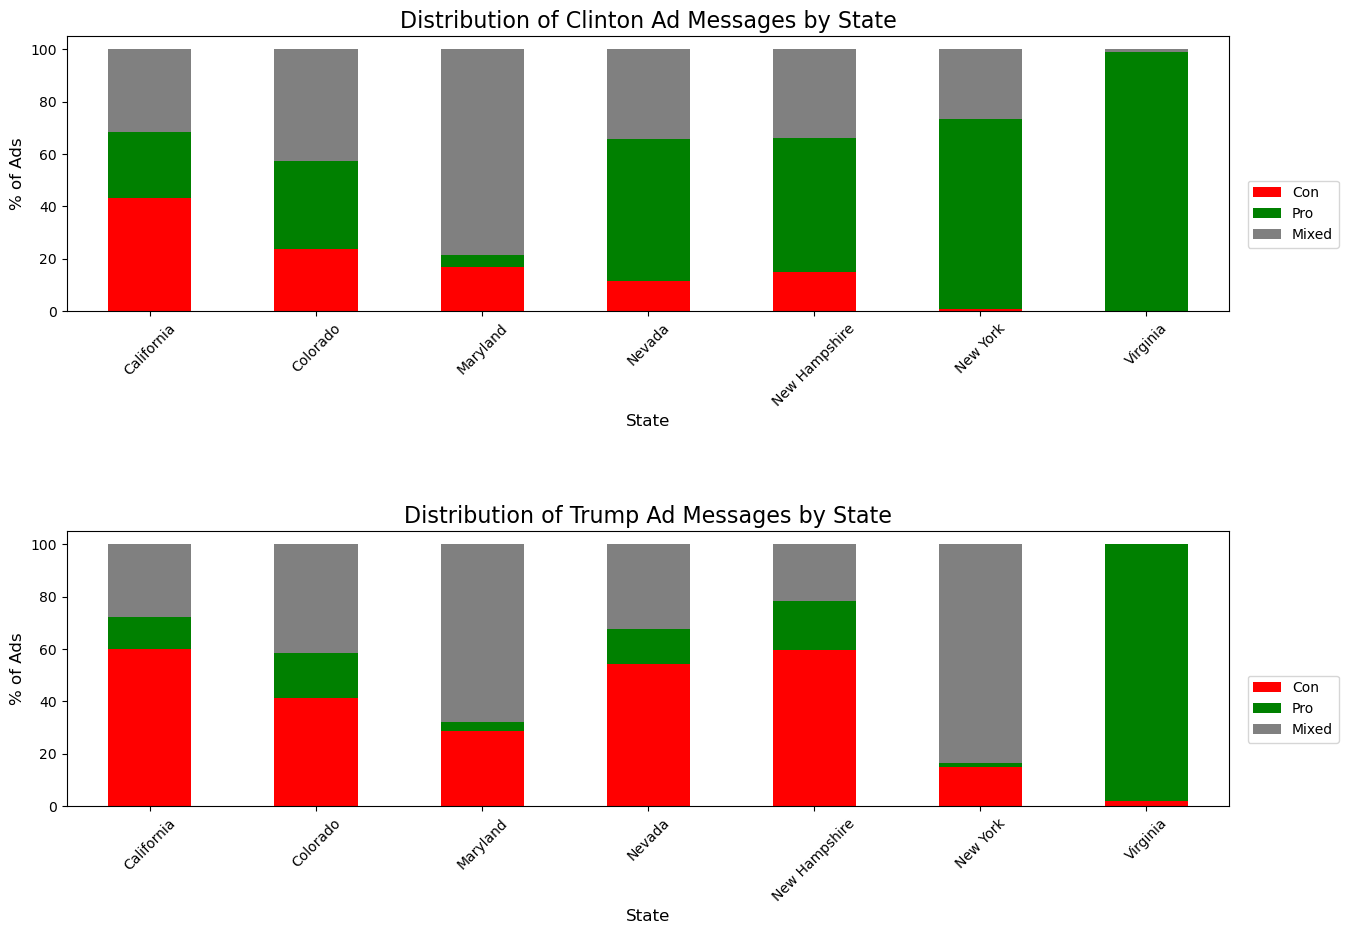

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
for winner in message_pct.winning_candidate.unique():
    winner_data = message_pct[message_pct.winning_candidate==winner]
    clinton_data = winner_data.sort_values(['Clinton_pro_pct'],ascending=False)
    clinton_data = winner_data[[
        'Clinton_con_pct',
        'Clinton_pro_pct',
        'Clinton_mixed_pct'
    ]]
    clinton_data.plot(
        kind='bar',
        stacked=True,
        ax=ax1,
        color= ['red','green','gray'],
        label=winner
    )

ax1.set_title('Distribution of Clinton Ad Messages by State', fontsize=16)
ax1.set_xlabel('State',fontsize=12)
ax1.set_ylabel('% of Ads', fontsize=12)
#ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(winner_data['state'],rotation=45)
ax1.legend(['Con','Pro','Mixed'], bbox_to_anchor=(1.1,0.5))

for winner in message_pct.winning_candidate.unique():
    winner_data = message_pct[message_pct.winning_candidate==winner]
    trump_data = winner_data.sort_values(['Trump_pro_pct'],ascending=False)
    trump_data = winner_data[[
        'Trump_con_pct',
        'Trump_pro_pct',
        'Trump_mixed_pct'
    ]]
    trump_data.plot(
        kind='bar',
        stacked=True,
        ax=ax2,
        color= ['red','green','gray'],
        label=winner
    )

ax2.set_title('Distribution of Trump Ad Messages by State', fontsize=16)
ax2.set_xlabel('State',fontsize=12)
ax2.set_ylabel('% of Ads', fontsize=12)
ax2.set_xticklabels(winner_data['state'],rotation=45)
ax2.legend(['Con','Pro','Mixed'], bbox_to_anchor=(1.1,0.5))

plt.subplots_adjust(hspace=0.8)

plt.show()

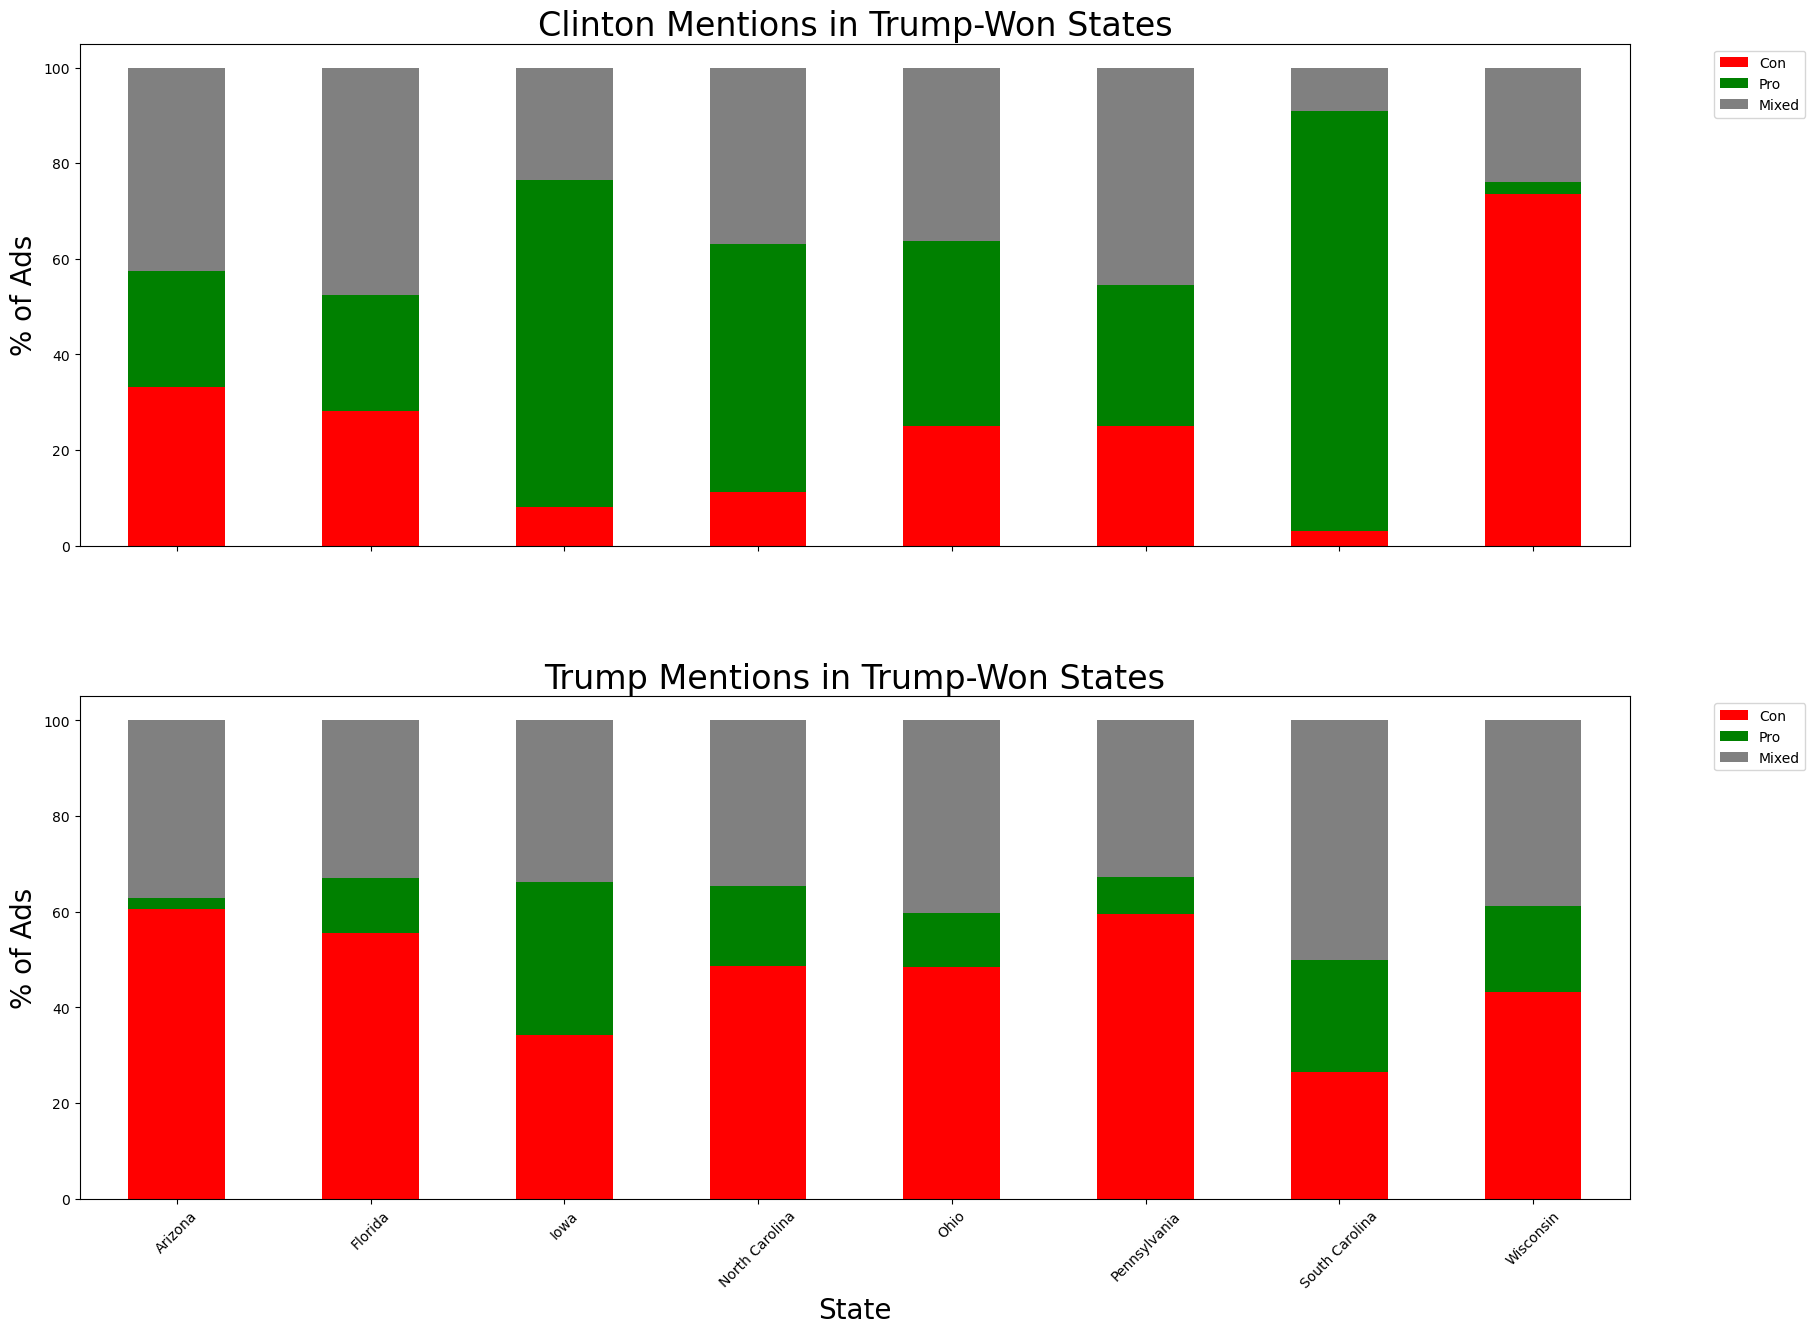

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

clinton_won = message_pct[message_pct.winning_candidate == 'CLINTON, HILLARY']
trump_won = message_pct[message_pct.winning_candidate == 'TRUMP, DONALD J.']

# 1. Clinton messages in Trump-won states
trump_won[[
    'Clinton_con_pct',
    'Clinton_pro_pct',
    'Clinton_mixed_pct'
]].plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=['red', 'green', 'gray'],
    sharex=True
)
ax1.set_title('Clinton Mentions in Trump-Won States', fontsize=24)
ax1.set_xlabel('State', fontsize=20)
ax1.set_ylabel('% of Ads', fontsize=20)
ax1.set_xticklabels(trump_won['state'], rotation=45)
ax1.legend(['Con', 'Pro', 'Mixed'], bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Trump messages in Trump-won states
trump_won[[
    'Trump_con_pct',
    'Trump_pro_pct',
    'Trump_mixed_pct'
]].plot(
    kind='bar',
    stacked=True,
    ax=ax2,
    color=['red', 'green', 'gray']
)
ax2.set_title('Trump Mentions in Trump-Won States', fontsize=24)
ax2.set_xlabel('State', fontsize=20)
ax2.set_ylabel('% of Ads', fontsize=20)
ax2.set_xticklabels(trump_won['state'], rotation=45)
ax2.legend(['Con', 'Pro', 'Mixed'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(wspace=0.4, hspace=0.3, right=0.9)
plt.show()

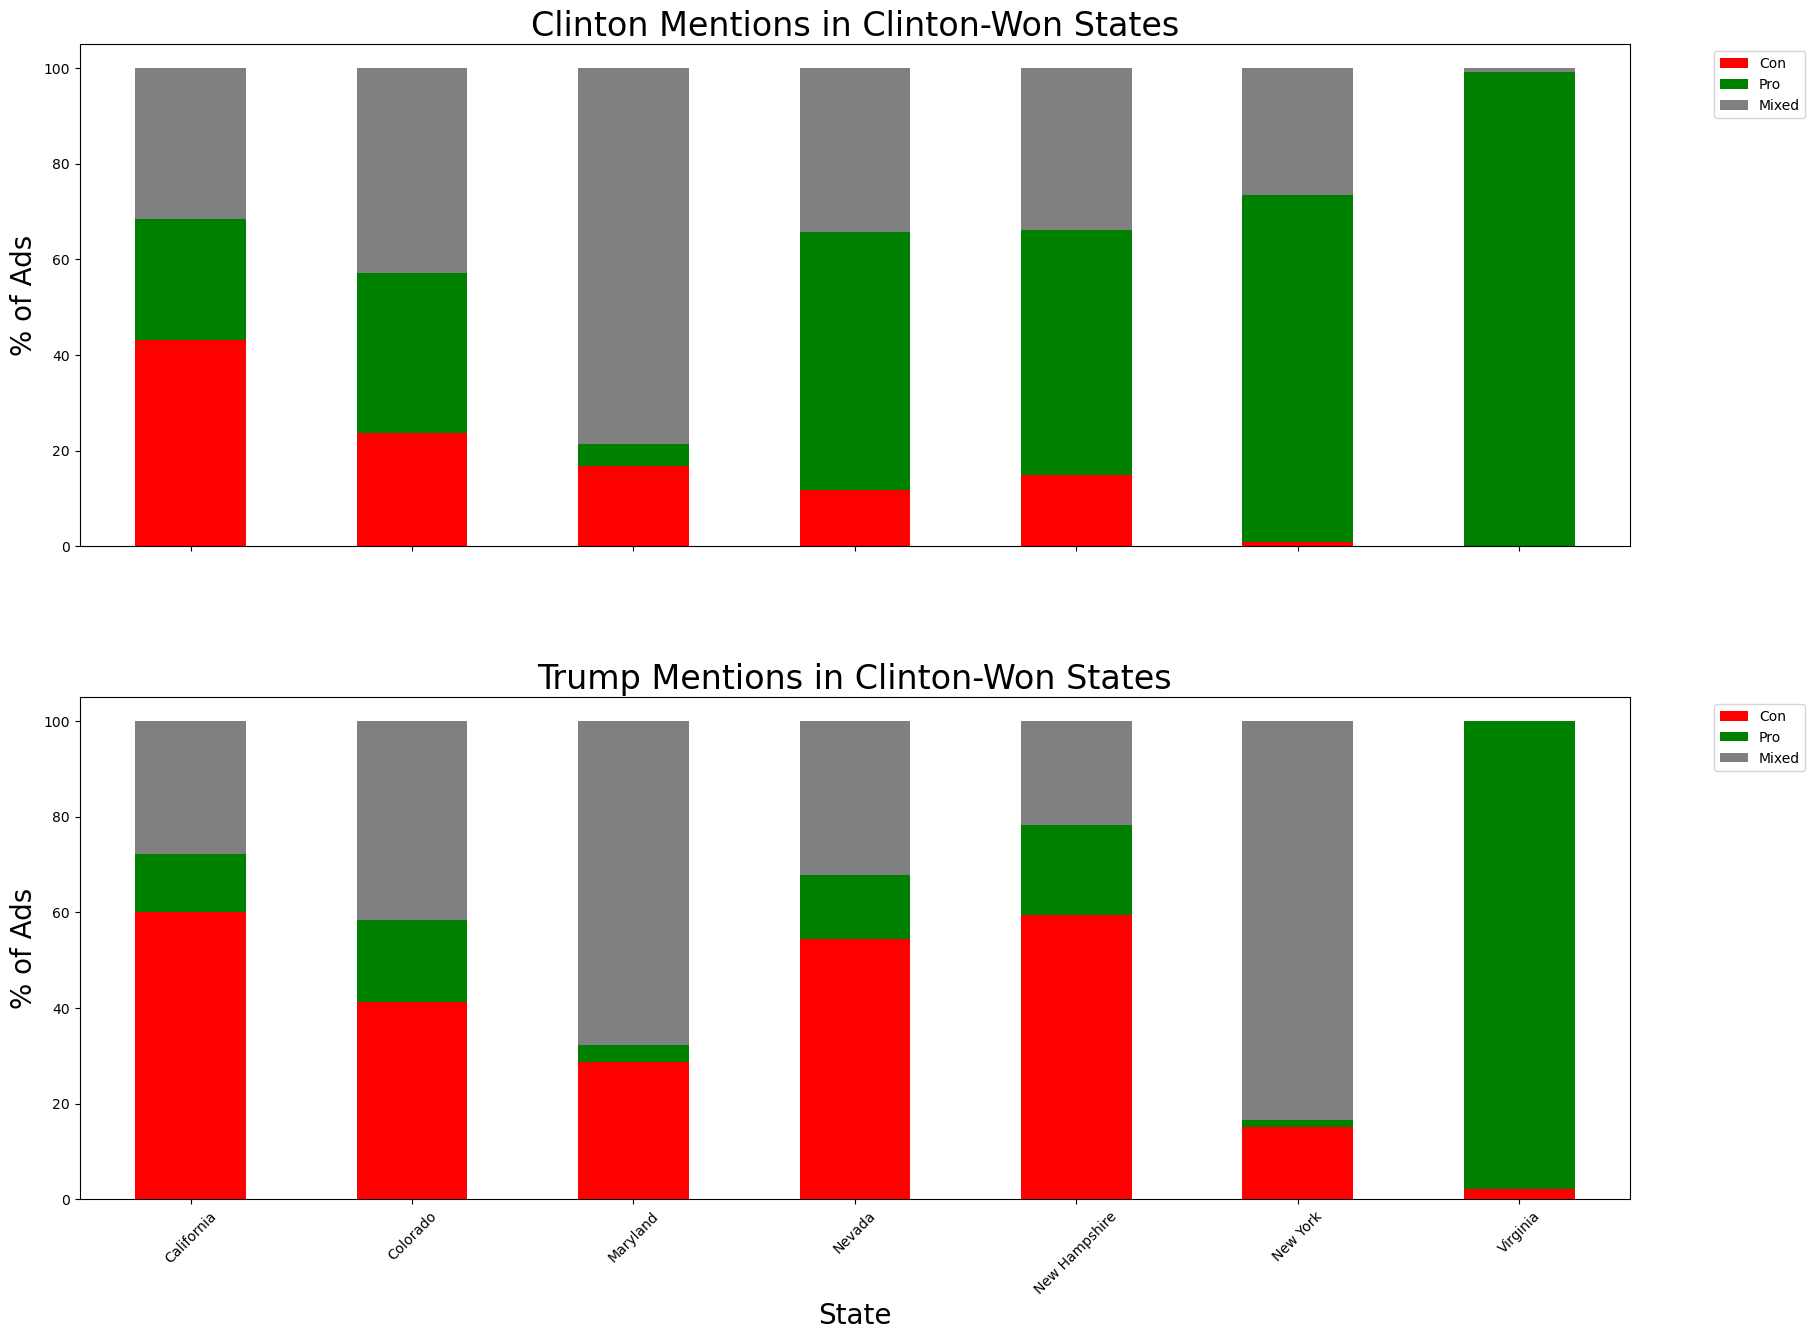

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

clinton_won = message_pct[message_pct.winning_candidate == 'CLINTON, HILLARY']
trump_won = message_pct[message_pct.winning_candidate == 'TRUMP, DONALD J.']

# 1. Clinton messages in Clinton-won states
clinton_won[[
    'Clinton_con_pct',
    'Clinton_pro_pct',
    'Clinton_mixed_pct'
]].plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=['red', 'green', 'gray'],
    sharex=True
)
ax1.set_title('Clinton Mentions in Clinton-Won States', fontsize=24)
ax1.set_xlabel('State', fontsize=20)
ax1.set_ylabel('% of Ads', fontsize=20)
ax1.set_xticklabels(clinton_won['state'], rotation=45)
ax1.legend(['Con', 'Pro', 'Mixed'], bbox_to_anchor=(1.05, 1), loc='upper left')


# 2. Trump messages in Clinton-won states
clinton_won[[
    'Trump_con_pct',
    'Trump_pro_pct',
    'Trump_mixed_pct'
]].plot(
    kind='bar',
    stacked=True,
    ax=ax2,
    color=['red', 'green', 'gray']
)
ax2.set_title('Trump Mentions in Clinton-Won States', fontsize=24)
ax2.set_xlabel('State', fontsize=20)
ax2.set_ylabel('% of Ads', fontsize=20)
ax2.set_xticklabels(clinton_won['state'], rotation=45)
ax2.legend(['Con', 'Pro', 'Mixed'], bbox_to_anchor=(1.05, 1), loc='upper left')


plt.subplots_adjust(wspace=0.4, hspace=0.3, right=0.9)
plt.show()